In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteG6CPIR/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteG6CPIR/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteG6CPIR/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [ ]:
set(training_labels)

{0, 1}

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'

In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
len(sequences)

25000

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [ ]:
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model_rnn.fit(padded, training_labels_final, epochs=3,
                  validation_data = (testing_padded, testing_labels_final))

Epoch 1/3
782/782 [==============================] - 136s 173ms/step - loss: 0.6765 - accuracy: 0.5688 - val_loss: 0.6095 - val_accuracy: 0.6622
Epoch 2/3
782/782 [==============================] - 114s 146ms/step - loss: 0.5514 - accuracy: 0.7195 - val_loss: 0.5641 - val_accuracy: 0.7589
Epoch 3/3
782/782 [==============================] - 115s 148ms/step - loss: 0.3717 - accuracy: 0.8431 - val_loss: 0.4026 - val_accuracy: 0.8195


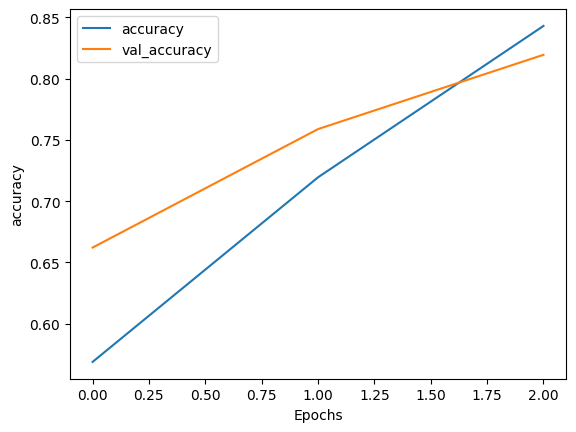

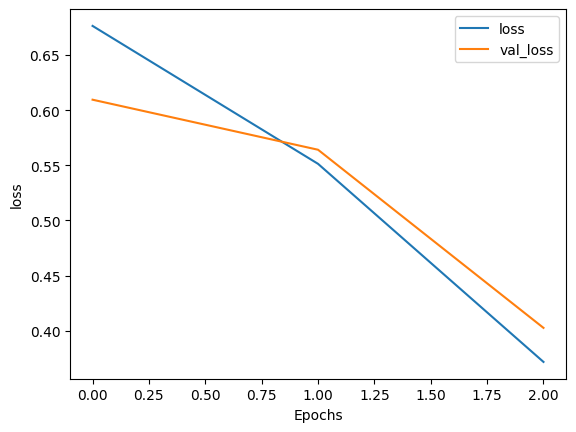

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
from keras.layers import Bidirectional, GRU

In [ ]:
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170,261
Trainable params: 170,261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model_gru.fit(padded, training_labels_final, epochs=3,
                  validation_data = (testing_padded, testing_labels_final))

Epoch 1/3
782/782 [==============================] - 53s 59ms/step - loss: 0.5172 - accuracy: 0.7142 - val_loss: 0.3615 - val_accuracy: 0.8440
Epoch 2/3
782/782 [==============================] - 19s 24ms/step - loss: 0.2952 - accuracy: 0.8798 - val_loss: 0.3533 - val_accuracy: 0.8492
Epoch 3/3
782/782 [==============================] - 18s 23ms/step - loss: 0.2228 - accuracy: 0.9129 - val_loss: 0.4046 - val_accuracy: 0.8342


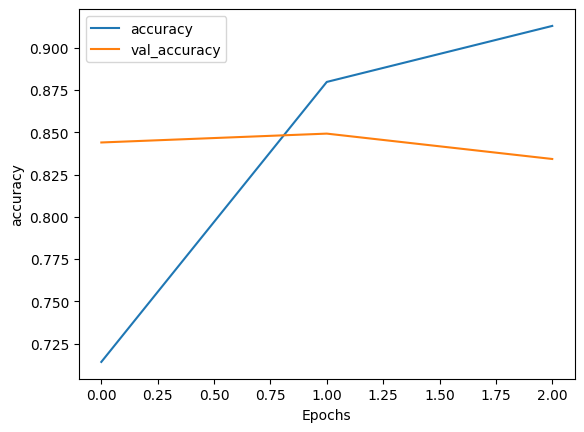

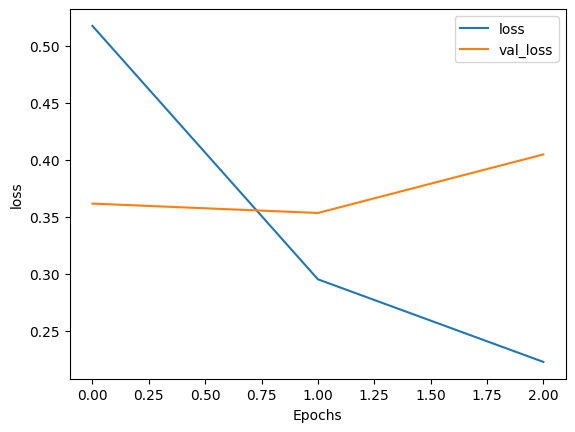

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
from keras.layers import LSTM

In [ ]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model_lstm.fit(padded, training_labels_final, epochs=3,
                  validation_data = (testing_padded, testing_labels_final))

Epoch 1/3
782/782 [==============================] - 51s 60ms/step - loss: 0.6464 - accuracy: 0.6158 - val_loss: 0.5456 - val_accuracy: 0.7397
Epoch 2/3
782/782 [==============================] - 18s 24ms/step - loss: 0.4255 - accuracy: 0.8164 - val_loss: 0.3650 - val_accuracy: 0.8448
Epoch 3/3
782/782 [==============================] - 19s 25ms/step - loss: 0.2815 - accuracy: 0.8934 - val_loss: 0.3996 - val_accuracy: 0.8436


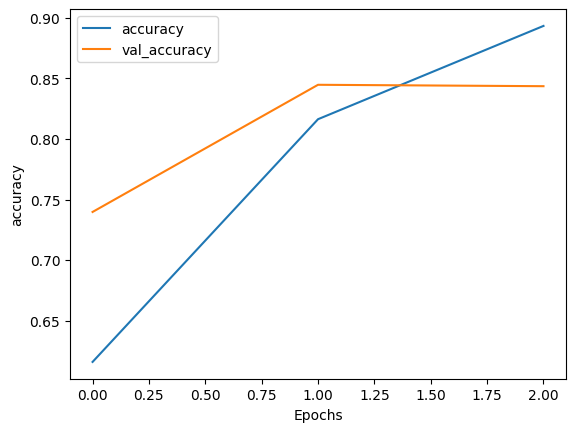

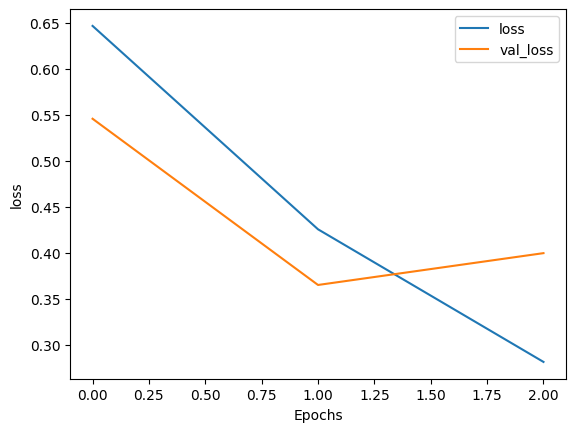

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
new1 = 'The was worst movie. Please do not watch it. Waste of mone and time'
new2 = 'A must watch movie. I loved to watch it. It was jus amazing!'

In [ ]:
seq = tokenizer.texts_to_sequences([new1])
pad = pad_sequences(seq, maxlen=max_length,
                       truncating = trunc_type)

result = model_gru.predict(pad, verbose = False)
percent_pos = result[0,0]
if round(percent_pos) == 0:
  print((1-percent_pos), 'NEGATIVE')
else:
  print(percent_pos, 'POSITIVE')

0.9988278391538188 NEGATIVE
